## Execution of 2nd Logic for irrigation water prediction

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_excel("parmeters.xlsx")
data
data_copy = data.copy()

In [39]:
#data[data["H"]>=5]

In [40]:
# Dividing the data points into different climatic zones
data['zone'] = ""
data.loc[data.H < 20, 'zone'] = 'arid'
data.loc[(data.H>=20) & (data.H<50), 'zone'] = 'semi arid'
data.loc[(data.H >=50) & (data.H<75), 'zone'] = 'sub humid'
data.loc[data.H >=75, 'zone'] = 'humid'

Kc values at : Initial | Crop development | Mid-season | Harvest stages\
Cotton \
Kc : 0.45 0.75 1.15 0.75

Millet or Sorghum \
Kc : 0.35 0.75 1.10 0.65

Maize \
Kc : 0.40 0.75 1.15 0.70

Sugarcane \
Kc : 0.45 0.85 1.15 0.65



## MILLET

In [41]:

#Millet is sowed in high humid conditions
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'harvest'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'midseason'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'crop dev'
data.loc[data.H >90, 'period'] = 'sow'

#Kc values according to the data above
data.loc[data["period"]=="sow" , "kc"] = 0.35
data.loc[data["period"]=="crop dev","kc"] = 0.75
data.loc[data["period"]=="midseason","kc"] = 1.10
data.loc[data["period"]=="harvest","kc"] = 0.65


In [42]:
#Absolute evapotranspiration acc to temperature and humidity conditions taken from fao website
data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

In [43]:
data["Etc"] = data["kc"]*data["ETo"]
#data

In [44]:
data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


#water required calculation as per eqn from fao website
avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_millet = sow_water+dev_water+mid_water+harvest_water
#water_millet

<BarContainer object of 4 artists>

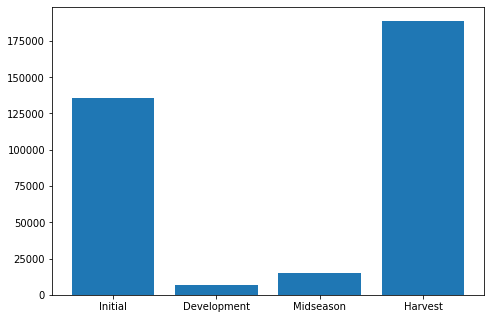

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)

## SUGARCANE

712191.3949932465


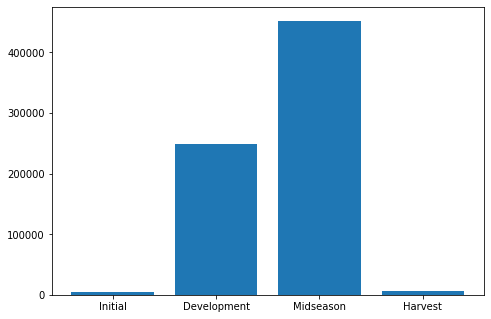

In [46]:
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'crop dev'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'sow'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'harvest'
data.loc[data.H >90, 'period'] = 'midseason'

data.loc[data["period"]=="sow" , "kc"] = 0.40
data.loc[data["period"]=="crop dev","kc"] = 0.85
data.loc[data["period"]=="midseason","kc"] = 1.15
data.loc[data["period"]=="harvest","kc"] = 0.65

data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

data["Etc"] = data["kc"]*data["ETo"]
data

data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_sugar = sow_water+dev_water+mid_water+harvest_water

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)
print(water_sugar)

## COTTON

684127.6199932465


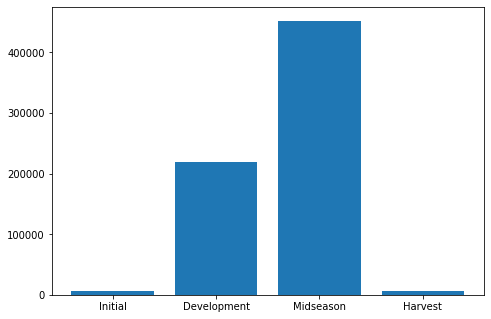

In [47]:
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'crop dev'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'sow'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'harvest'
data.loc[data.H >90, 'period'] = 'midseason'

data.loc[data["period"]=="sow" , "kc"] = 0.45
data.loc[data["period"]=="crop dev","kc"] = 0.75
data.loc[data["period"]=="midseason","kc"] = 1.15
data.loc[data["period"]=="harvest","kc"] = 0.75

data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

data["Etc"] = data["kc"]*data["ETo"]
data

data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_cotton = sow_water+dev_water+mid_water+harvest_water

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)
print(water_cotton)

## MAIZE

428990.2949932465


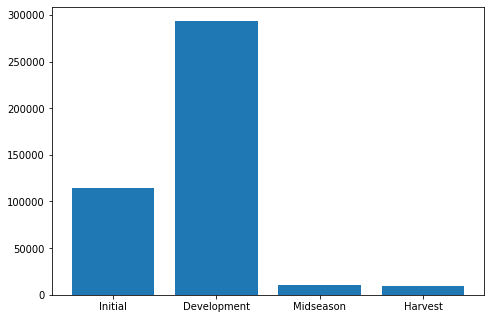

In [48]:
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'sow'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'harvest'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'midseason'
data.loc[data.H >90, 'period'] = 'crop dev'

data.loc[data["period"]=="sow" , "kc"] = 0.40
data.loc[data["period"]=="crop dev","kc"] = 0.75
data.loc[data["period"]=="midseason","kc"] = 1.15
data.loc[data["period"]=="harvest","kc"] = 0.70

data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

data["Etc"] = data["kc"]*data["ETo"]
data

data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_maize = sow_water+dev_water+mid_water+harvest_water

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)
print(water_maize)

## Comaprison of water required for all 4 crops

<BarContainer object of 4 artists>

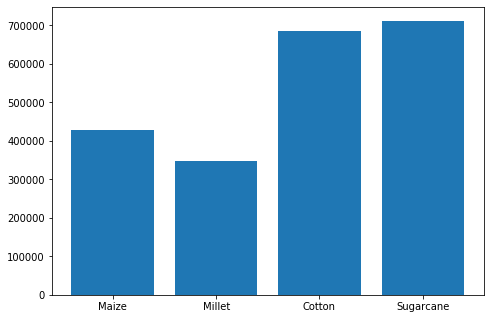

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Maize', 'Millet', 'Cotton', 'Sugarcane']
amt = [water_maize,water_millet,water_cotton,water_sugar]
ax.bar(season,amt)

# Repeating data - 5 times

In [53]:
data_new = pd.read_excel("parmeters.xlsx")

In [54]:
frames = [data_new,data_new,data_new,data_new,data_new]
data = pd.concat(frames)

# Dividing the data points into different climatic zones
data['zone'] = ""
data.loc[data.H < 20, 'zone'] = 'arid'
data.loc[(data.H>=20) & (data.H<50), 'zone'] = 'semi arid'
data.loc[(data.H >=50) & (data.H<75), 'zone'] = 'sub humid'
data.loc[data.H >=75, 'zone'] = 'humid'

# MILLET (with 5 times big data)

<BarContainer object of 4 artists>

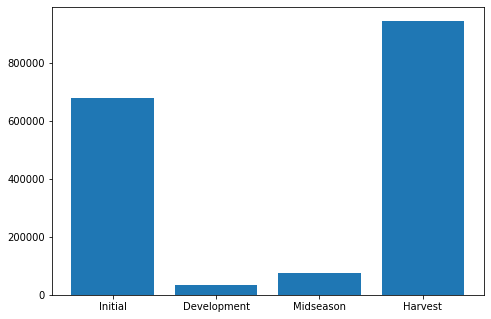

In [55]:
#Millet is sowed in high humid conditions
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'harvest'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'midseason'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'crop dev'
data.loc[data.H >90, 'period'] = 'sow'

#Kc values according to the data above
data.loc[data["period"]=="sow" , "kc"] = 0.35
data.loc[data["period"]=="crop dev","kc"] = 0.75
data.loc[data["period"]=="midseason","kc"] = 1.10
data.loc[data["period"]=="harvest","kc"] = 0.65

#Absolute evapotranspiration acc to temperature and humidity conditions taken from fao website
data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

data["Etc"] = data["kc"]*data["ETo"]
#data

data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


#water required calculation as per eqn from fao website
avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_millet = sow_water+dev_water+mid_water+harvest_water
#water_millet

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)

## SUGARCANE (With 5 times big data)

3560956.9749662327


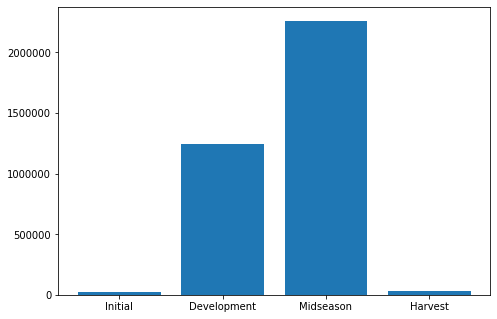

In [56]:
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'crop dev'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'sow'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'harvest'
data.loc[data.H >90, 'period'] = 'midseason'

data.loc[data["period"]=="sow" , "kc"] = 0.40
data.loc[data["period"]=="crop dev","kc"] = 0.85
data.loc[data["period"]=="midseason","kc"] = 1.15
data.loc[data["period"]=="harvest","kc"] = 0.65

data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

data["Etc"] = data["kc"]*data["ETo"]
data

data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_sugar = sow_water+dev_water+mid_water+harvest_water

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)
print(water_sugar)

## COTTON (With 5 times data)

3420638.0999662327


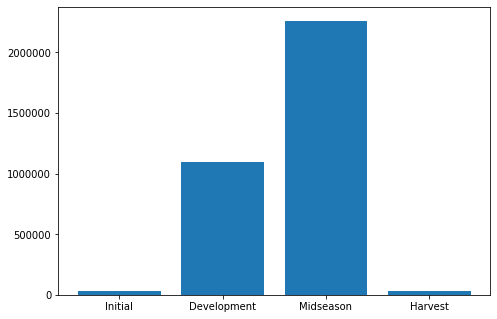

In [57]:
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'crop dev'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'sow'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'harvest'
data.loc[data.H >90, 'period'] = 'midseason'

data.loc[data["period"]=="sow" , "kc"] = 0.45
data.loc[data["period"]=="crop dev","kc"] = 0.75
data.loc[data["period"]=="midseason","kc"] = 1.15
data.loc[data["period"]=="harvest","kc"] = 0.75

data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

data["Etc"] = data["kc"]*data["ETo"]
data

data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_cotton = sow_water+dev_water+mid_water+harvest_water

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)
print(water_cotton)

## MAIZE (With 5 times data)

2144951.4749662327


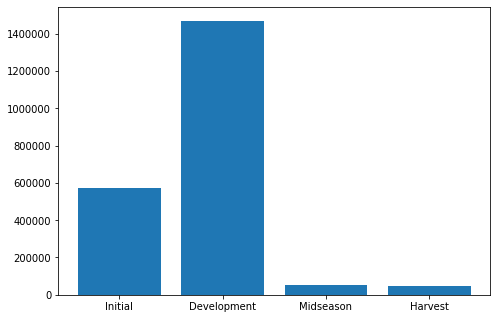

In [58]:
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'sow'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'harvest'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'midseason'
data.loc[data.H >90, 'period'] = 'crop dev'

data.loc[data["period"]=="sow" , "kc"] = 0.40
data.loc[data["period"]=="crop dev","kc"] = 0.75
data.loc[data["period"]=="midseason","kc"] = 1.15
data.loc[data["period"]=="harvest","kc"] = 0.70

data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

data["Etc"] = data["kc"]*data["ETo"]
data

data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_maize = sow_water+dev_water+mid_water+harvest_water

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)
print(water_maize)

<BarContainer object of 4 artists>

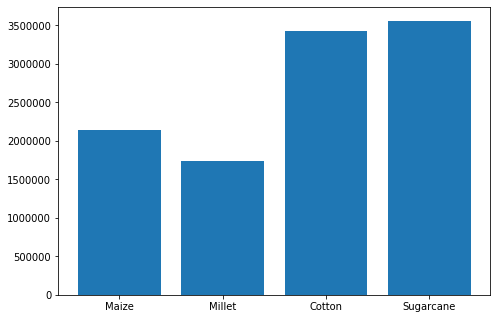

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Maize', 'Millet', 'Cotton', 'Sugarcane']
amt = [water_maize,water_millet,water_cotton,water_sugar]
ax.bar(season,amt)